In [ ]:
#initial clusters based on simple KMeans
import pandas as pd
from sklearn.cluster import KMeans 

df_microwaves = pd.read_csv("data/microwave_new.csv")
df_microwaves = df_microwaves[~((df_microwaves["cu_ft"] == "unknown") & (df_microwaves["price_value"] < 70))]
df_microwaves["commerical"] = df_microwaves["title"].str.contains("Commercial", case=False, na=False)

prices = df_microwaves[["price_value"]].copy()
kmeans = KMeans(n_clusters=3, random_state=0).fit(prices)
df_microwaves["price_cluster"] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_order = np.argsort(cluster_centers)
cluster_map = {old: label for old, label in zip(cluster_order, ["low", "medium", "high"])}
df_microwaves["price_tier"] = df_microwaves["price_cluster"].map(cluster_map)
cluster_ranges = df_microwaves.groupby(["price_tier"])["price_value"].agg(["min", "median", "max", "count"]).round(2)
print(cluster_ranges)

                min   median      max  count
price_tier                                  
high        1197.00  1411.00  1799.00      8
low           44.99   149.99   399.95    103
medium       468.00   637.50  1017.46      8


Because these clusters were highly imbalanced, KMeans Constrained was done.  

### Add pricing tiers

In [1]:
#run kmc.py in a virtual environment (kmc-env) to export the data sets with kmeans constrained clusters 
#this had to be done in a separate environment due to version issues in the kernel

import pandas as pd
import numpy as np

tier_order = ["low", "medium", "high"]

df_iphone = pd.read_csv("data/iphone_kmc.csv")
df_iphone["price_tier"] = pd.Categorical(df_iphone["price_tier"], categories=tier_order, ordered=True)
summary_iphone = df_iphone.groupby(["price_tier"]).agg({
    "price.value": ['count', 'mean', 'min', "median", 'max']})
print("iPhone Summary")
print(summary_iphone, "\n")
median_iphone = df_iphone["price.value"].median()
df_iphone["is_high_price"] = df_iphone["price.value"] > median_iphone

df_soccer = pd.read_csv("data/soccer_kmc.csv")
df_soccer["price_tier"] = pd.Categorical(df_soccer["price_tier"], categories=tier_order, ordered=True)
summary_soccer = df_soccer.groupby(["price_tier"]).agg({
    "price.value": ['count', 'mean', 'min', "median", 'max']})
print("Soccer Summary")
print(summary_soccer, "\n")
median_soccer = df_soccer["price.value"].median()
df_soccer["is_high_price"] = df_soccer["price.value"] > median_soccer

df_microwaves = pd.read_csv("data/microwave_kmc.csv")
df_microwaves["price_tier"] = pd.Categorical(df_microwaves["price_tier"], categories=tier_order, ordered=True)
summary_microwave = df_microwaves.groupby(["price_tier"]).agg({
    "price_value": ['count', 'mean', 'min', "median", 'max']})
print("Microwaves Summary")
print(summary_microwave, "\n")
median_microwave = df_microwaves["price_value"].median()
df_microwaves["is_high_price"] = df_microwaves["price_value"] > median_microwave

df_lego = pd.read_csv("data/lego_kmc.csv")
df_lego["price_tier"] = pd.Categorical(df_lego["price_tier"], categories=tier_order, ordered=True)
summary_lego = df_lego.groupby(["price_tier"]).agg({
    "price_value": ['count', 'mean', 'min', "median", 'max']})
print("Lego Summary")
print(summary_lego, "\n")
median_lego = df_lego["price_value"].median()
df_lego["is_high_price"] = df_lego["price_value"] > median_lego


iPhone Summary
           price.value                                      
                 count        mean     min   median      max
price_tier                                                  
low                124  352.649919  215.00  349.915   439.99
medium             166  536.551687  446.99  537.975   650.00
high                96  848.694583  650.00  776.995  1449.99 

Soccer Summary
           price.value                                 
                 count       mean    min median     max
price_tier                                             
low                336  27.519554   5.94  28.98   38.50
medium             414  49.747512  38.88  49.99   60.00
high               250  83.140840  60.00  73.90  299.99 

Microwaves Summary
           price_value                                     
                 count        mean     min  median      max
price_tier                                                 
low                 56  106.860357   44.99  108.95   168.39
mediu

/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_87119/476520994.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_iphone = df_iphone.groupby(["price_tier"]).agg({
/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_87119/476520994.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_soccer = df_soccer.groupby(["price_tier"]).agg({
/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_87119/476520994.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior

### module imports

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt



### iPhone

#### DT

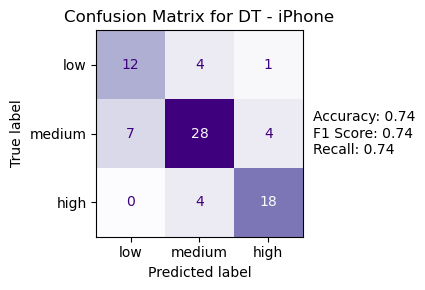

Accuracy: 0.7435897435897436
F1 Score: 0.7442735042735042
Recall Score: 0.7435897435897436


In [3]:

tier_order = ["low", "medium", "high"]

X_iphone = df_iphone.drop(columns=["itemId", "title", "conditionId", "price.value", 
                                   "price_tier", "seller.username", "condition_desc", 
                                   "category_id", "price.currency", "cluster", "is_high_price"])

X_iphone_encoded = pd.get_dummies(X_iphone, columns=["condition", "itemLocation.country", "category_name",
                                                    "specific_carrier"])
y_iphone = df_iphone["price_tier"]                              
X_iphone_train, X_iphone_test, y_iphone_train, y_iphone_test = train_test_split(X_iphone_encoded, y_iphone,
                                                                 test_size=0.20, random_state=1216) 
classifier_iphone = DecisionTreeClassifier(random_state = 1216)
classifier_iphone.fit(X_iphone_train, y_iphone_train)

preds_iphone = classifier_iphone.predict(X_iphone_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_iphone_test, preds_iphone)
f1 = f1_score(y_iphone_test, preds_iphone, average="weighted")
recall = recall_score(y_iphone_test, preds_iphone, average="weighted")
cm_iphone = confusion_matrix(y_iphone_test, preds_iphone, labels=tier_order)
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=tier_order)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('Confusion Matrix for DT - iPhone')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_iphone.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

#### RF

In [ ]:
## tuning, takes several minutes to run
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=1216)
# grid_search_iphone = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
# grid_search_iphone.fit(X_iphone_train, y_iphone_train)

# best_model_iphone = grid_search_iphone.best_estimator_

In [213]:
# print(grid_search_iphone.best_params_)
# print(grid_search_iphone.best_score_)

{'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

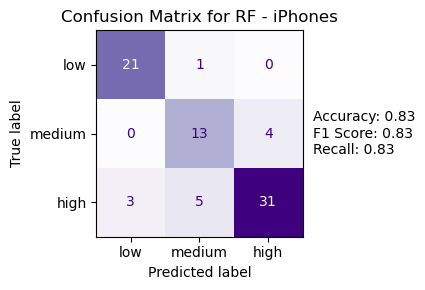

Accuracy: 0.8333333333333334
F1 Score: 0.8338514099383664
Recall Score: 0.8333333333333334


In [4]:
tier_order = ["low", "medium", "high"]
rf_iphone = RandomForestClassifier(random_state = 1216,
                                    n_estimators = 100,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1)

rf_iphone.fit(X_iphone_train, y_iphone_train)
preds_rf_microwave = rf_iphone.predict(X_iphone_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_iphone_test, preds_rf_microwave)
f1 = f1_score(y_iphone_test, preds_rf_microwave, average="weighted")
recall = recall_score(y_iphone_test, preds_rf_microwave, average="weighted")
cm_iphone = confusion_matrix(y_iphone_test, preds_rf_microwave)
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=tier_order)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('Confusion Matrix for RF - iPhones')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_iphone.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

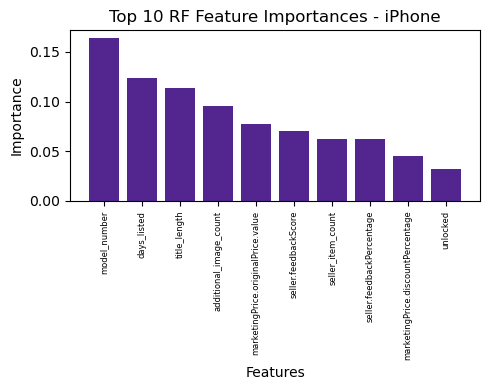

In [11]:
importances = rf_iphone.feature_importances_
indices = np.argsort(importances)[::-1]

# Limit to top 10
top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(5, 4))
plt.title("Top 10 RF Feature Importances - iPhone")
plt.bar(range(top_n), importances[top_indices], align="center", color="#53268f")
plt.xticks(range(top_n), [X_iphone_train.columns[i] for i in top_indices], rotation=90, fontsize=6)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig("images/3/fi_iphone_top10.png", dpi=300, bbox_inches='tight')
plt.show()

Class 0 = high
Class 1 = low
Class 2 = medium


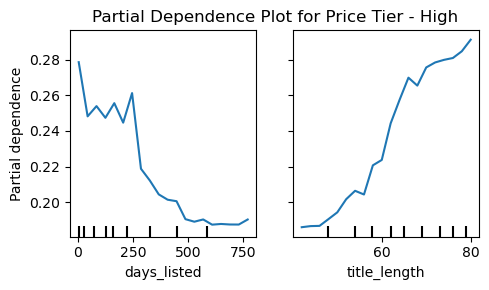

In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_iphone_encoded = le.fit_transform(df_iphone["price_tier"])  # converts to 0,1,2
X_iphone_train, X_iphone_test, y_iphone_train, y_iphone_test = train_test_split(
    X_iphone_encoded, y_iphone_encoded, test_size=0.20, random_state=1216
)
rf_iphone.fit(X_iphone_train, y_iphone_train)
for i, class_label in enumerate(le.classes_):
    print(f"Class {i} = {class_label}")

import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
feature_names = ['days_listed', "title_length"]
fig, ax = plt.subplots(figsize=(5, 3))
PartialDependenceDisplay.from_estimator(
    rf_iphone,
    X_iphone_train,
    features=feature_names,
    kind='average',
    target=0,
    grid_resolution=20,
    ax=ax
)
ax.set_title("Partial Dependence Plot for Price Tier - High")
plt.tight_layout()
plt.savefig("images/3/pdp_iphone.png", dpi=300, bbox_inches='tight')
plt.show()


### Soccer

#### DT

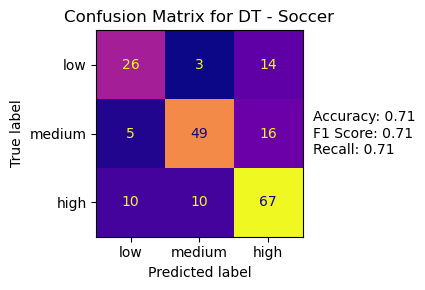

Accuracy: 0.71
F1 Score: 0.7097372012045925
Recall Score: 0.71


In [5]:
tier_order = ["low", "medium", "high"]
X_soccer = df_soccer.drop(columns=["itemId", "title", "conditionId", "price.value", 
                                   "price_tier", "seller.username", "condition_desc", 
                                   "category_id", "price.currency", "cluster", "top_club",
                                   "top_country", "is_high_price"])

X_soccer_encoded = pd.get_dummies(X_soccer, columns=["condition", "itemLocation.country", "category_name",
                                                    "club", "country"])
y_soccer = df_soccer["price_tier"]                              
X_soccer_train, X_soccer_test, y_soccer_train, y_soccer_test = train_test_split(X_soccer_encoded, y_soccer,
                                                                 test_size=0.20, random_state=1216) 
classifier_soccer = DecisionTreeClassifier(random_state = 1216)
classifier_soccer.fit(X_soccer_train, y_soccer_train)
preds_soccer = classifier_soccer.predict(X_soccer_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_soccer_test, preds_soccer)
f1 = f1_score(y_soccer_test, preds_soccer, average="weighted")
recall = recall_score(y_soccer_test, preds_soccer, average="weighted")

cm_soccer = confusion_matrix(y_soccer_test, preds_soccer)
fig, ax = plt.subplots(figsize=(5,3))
disp_soccer = ConfusionMatrixDisplay(confusion_matrix=cm_soccer, display_labels=tier_order)
disp_soccer = disp_soccer.plot(ax=ax, cmap="plasma", colorbar=False)
disp_soccer.ax_.set_title('Confusion Matrix for DT - Soccer')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_soccer.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

#### RF

In [ ]:
## tuning, takes several minutes to run
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=1216)
# grid_search_soccer = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
# grid_search_soccer.fit(X_soccer_train, y_soccer_train)

# best_model_soccer = grid_search_soccer.best_estimator_

In [219]:
# print(grid_search_soccer.best_params_)
# print(grid_search_soccer.best_score_)

{'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


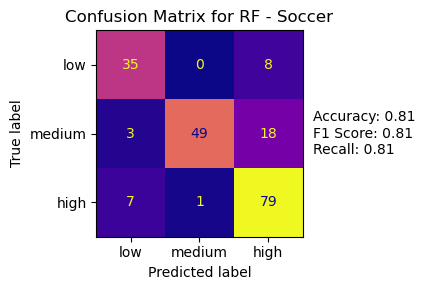

Accuracy: 0.815
F1 Score: 0.8148248106060606
Recall Score: 0.815


In [18]:
tier_order = ["low", "medium", "high"]
rf_soccer = RandomForestClassifier(random_state = 1216,
                                    n_estimators = 100,
                                    min_samples_split = 5,
                                    min_samples_leaf = 1,
                                    max_depth = 20,
                                    max_features = "log2")

rf_soccer.fit(X_soccer_train, y_soccer_train)
preds_rf_microwave = rf_soccer.predict(X_soccer_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_soccer_test, preds_rf_microwave)
f1 = f1_score(y_soccer_test, preds_rf_microwave, average="weighted")
recall = recall_score(y_soccer_test, preds_rf_microwave, average="weighted")
cm_soccer = confusion_matrix(y_soccer_test, preds_rf_microwave)
fig, ax = plt.subplots(figsize=(5,3))
disp_soccer = ConfusionMatrixDisplay(confusion_matrix=cm_soccer, display_labels=tier_order)
disp_soccer = disp_soccer.plot(ax=ax, cmap="plasma", colorbar=False)
disp_soccer.ax_.set_title('Confusion Matrix for RF - Soccer')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_soccer.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

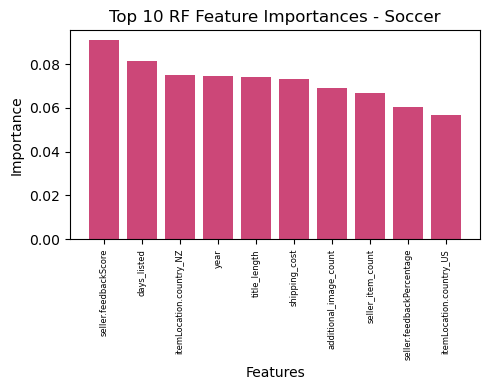

In [21]:
importances = rf_soccer.feature_importances_
indices = np.argsort(importances)[::-1]

# Limit to top 10
top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(5, 4))
plt.title("Top 10 RF Feature Importances - Soccer")
plt.bar(range(top_n), importances[top_indices], align="center", color="#cc4778")
plt.xticks(range(top_n), [X_soccer_train.columns[i] for i in top_indices], rotation=90, fontsize=6)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig("images/3/fi_soccer_top10.png", dpi=300, bbox_inches='tight')
plt.show()

### Microwaves

#### DT

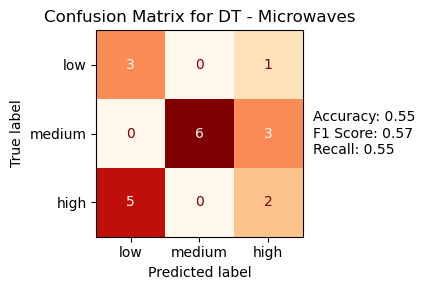

Accuracy: 0.55
F1 Score: 0.5676923076923076
Recall Score: 0.55


In [22]:
tier_order = ["low", "medium", "high"]
X_microwaves = df_microwaves.drop(columns=["title", "asin", "price_value", "price_tier", "coupon", 
                                           "price_list_price", "price_name", "cluster",
                                           "stock_info", "is_high_price"])
y_microwaves = df_microwaves["price_tier"]

temp = X_microwaves["cu_ft"] != "unknown"
X_microwaves = X_microwaves[temp].copy()
y_microwaves = y_microwaves[temp].copy()
X_microwaves["cu_ft"] = X_microwaves["cu_ft"].astype(float)

X_microwaves_train, X_microwaves_test, y_microwaves_train, y_microwaves_test = train_test_split(
    X_microwaves, y_microwaves, test_size=0.20, random_state=1216)
classifier_microwaves = DecisionTreeClassifier(random_state = 1216)
classifier_microwaves.fit(X_microwaves_train, y_microwaves_train)

preds_microwaves = classifier_microwaves.predict(X_microwaves_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_microwaves_test, preds_microwaves)
f1 = f1_score(y_microwaves_test, preds_microwaves, average="weighted")
recall = recall_score(y_microwaves_test, preds_microwaves, average="weighted")

cm_microwaves = confusion_matrix(y_microwaves_test, preds_microwaves)
fig, ax = plt.subplots(figsize=(5,3))
disp_microwaves = ConfusionMatrixDisplay(confusion_matrix=cm_microwaves, display_labels=tier_order)
disp_microwaves = disp_microwaves.plot(ax=ax, cmap="OrRd", colorbar=False)
disp_microwaves.ax_.set_title('Confusion Matrix for DT - Microwaves')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_microwave.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

#### RF

In [ ]:
## tuning, takes several minutes to run

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=1216)
# grid_search_microwaves = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
# grid_search_microwaves.fit(X_microwaves_train, y_microwaves_train)

# best_model_microwaves = grid_search_microwaves.best_estimator_

In [224]:
# print(grid_search_microwaves.best_params_)
# print(grid_search_microwaves.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


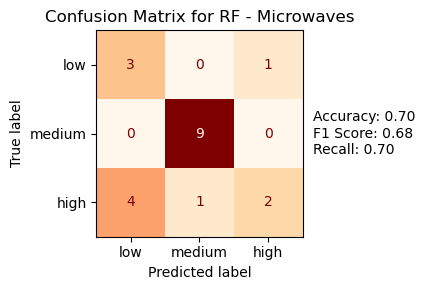

Accuracy: 0.7
F1 Score: 0.6754066985645932
Recall Score: 0.7


In [23]:
tier_order = ["low", "medium", "high"]
rf_microwaves = RandomForestClassifier(random_state = 1216,
                                       n_estimators = 200,
                                       min_samples_split = 5,
                                       min_samples_leaf = 2)

rf_microwaves.fit(X_microwaves_train, y_microwaves_train)
preds_rf_microwave = rf_microwaves.predict(X_microwaves_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_microwaves_test, preds_rf_microwave)
f1 = f1_score(y_microwaves_test, preds_rf_microwave, average="weighted")
recall = recall_score(y_microwaves_test, preds_rf_microwave, average="weighted")
cm_microwaves = confusion_matrix(y_microwaves_test, preds_rf_microwave)
fig, ax = plt.subplots(figsize=(5,3))
disp_microwaves = ConfusionMatrixDisplay(confusion_matrix=cm_microwaves, display_labels=tier_order)
disp_microwaves = disp_microwaves.plot(ax=ax, cmap="OrRd", colorbar=False)
disp_microwaves.ax_.set_title('Confusion Matrix for RF - Microwaves')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_microwave.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

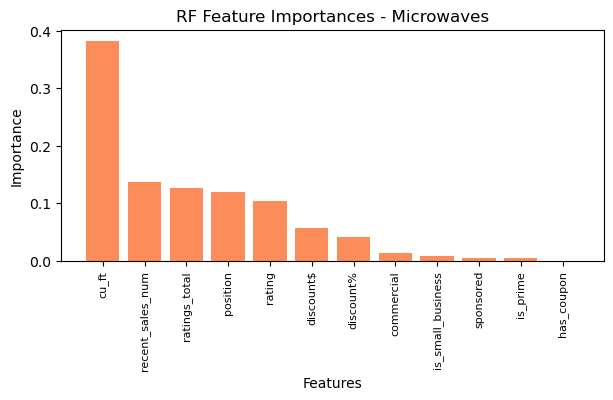

In [25]:
importances = rf_microwaves.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7, 3))
plt.title("RF Feature Importances - Microwaves")
plt.bar(range(X_microwaves_train.shape[1]), importances[indices], align="center", color="#fc8c59")
plt.xticks(range(X_microwaves_train.shape[1]), [X_microwaves_train.columns[i] for i in indices])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig("images/3/fi_microwave.png", dpi=300, bbox_inches='tight')
plt.show()

### Lego

#### DT

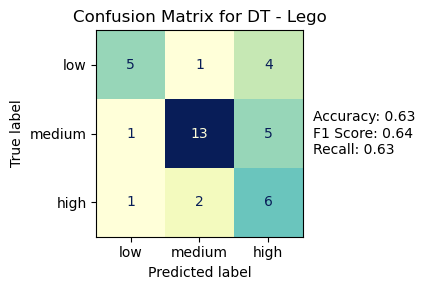

Accuracy: 0.631578947368421
F1 Score: 0.6446483856700574
Recall Score: 0.631578947368421


In [28]:
tier_order = ["low", "medium", "high"]
X_lego = df_lego.drop(columns=["title", "asin", "price_value", "price_tier", "coupon", 
                                "price_list_price", "price_name", "cluster",
                                "stock_info", "is_high_price"])

X_lego_encoded = pd.get_dummies(X_lego, columns=["lego_theme", "age_rec"])
y_lego = df_lego["price_tier"]                              
X_lego_train, X_lego_test, y_lego_train, y_lego_test = train_test_split(X_lego_encoded, y_lego,
                                                                 test_size=0.20, random_state=1216) 
classifier_lego = DecisionTreeClassifier(random_state = 1216)
classifier_lego.fit(X_lego_train, y_lego_train)

preds_lego = classifier_lego.predict(X_lego_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_lego_test, preds_lego)
f1 = f1_score(y_lego_test, preds_lego, average="weighted")
recall = recall_score(y_lego_test, preds_lego, average="weighted")

cm_lego = confusion_matrix(y_lego_test, preds_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=tier_order)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('Confusion Matrix for DT - Lego')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_lego.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

#### RF

In [ ]:
## tuning, takes several minutes to run
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=1216)
# grid_search_lego = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
# grid_search_lego.fit(X_lego_train, y_lego_train)

# best_model_lego = grid_search_lego.best_estimator_

In [229]:
# print(grid_search_lego.best_params_)
# print(grid_search_lego.best_score_)

{'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


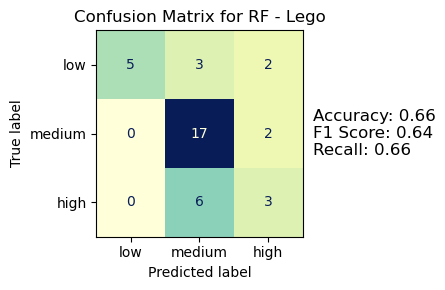

Accuracy: 0.6578947368421053
F1 Score: 0.64203216374269
Recall Score: 0.6578947368421053


In [29]:
tier_order = ["low", "medium", "high"]
rf_lego = RandomForestClassifier(random_state = 1216,
                                       n_estimators = 200,
                                       min_samples_split = 10,
                                       min_samples_leaf = 2)
rf_lego.fit(X_lego_train, y_lego_train)
preds_rf_lego = rf_lego.predict(X_lego_test)

accuracy = accuracy_score(y_lego_test, preds_rf_lego)
f1 = f1_score(y_lego_test, preds_rf_lego, average="weighted")
recall = recall_score(y_lego_test, preds_rf_lego, average="weighted")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
cm_lego = confusion_matrix(y_lego_test, preds_rf_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=tier_order)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('Confusion Matrix for RF - Lego')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_lego.png", dpi=300, bbox_inches='tight')
plt.show()


print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

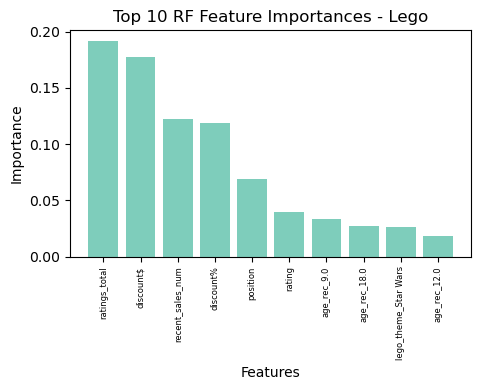

In [30]:
importances = rf_lego.feature_importances_
indices = np.argsort(importances)[::-1]

# Limit to top 10
top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(5, 4))
plt.title("Top 10 RF Feature Importances - Lego")
plt.bar(range(top_n), importances[top_indices], align="center", color="#7ecdbb")
plt.xticks(range(top_n), [X_lego_train.columns[i] for i in top_indices], rotation=90, fontsize=6)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig("images/3/fi_lego_top10.png", dpi=300, bbox_inches='tight')
plt.show()

Class 0 = high
Class 1 = low
Class 2 = medium


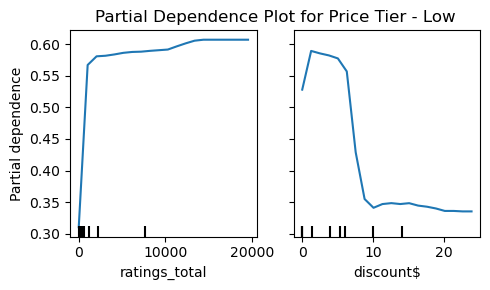

In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_lego_encoded = le.fit_transform(df_lego["price_tier"])  # converts to 0,1,2
X_lego_train, X_lego_test, y_lego_train, y_lego_test = train_test_split(
    X_lego_encoded, y_lego_encoded, test_size=0.20, random_state=1216
)
rf_lego.fit(X_lego_train, y_lego_train)
for i, class_label in enumerate(le.classes_):
    print(f"Class {i} = {class_label}")

import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
feature_names = ['ratings_total', "discount$"]
fig, ax = plt.subplots(figsize=(5, 3))
PartialDependenceDisplay.from_estimator(
    rf_lego,
    X_lego_train,
    features=feature_names,
    kind='average',
    target=1,
    grid_resolution=20,
    ax=ax
)
ax.set_title("Partial Dependence Plot for Price Tier - Low")
plt.tight_layout()
plt.savefig("images/3/pdp_lego.png", dpi=300, bbox_inches='tight')
plt.show()

#### Lego with 2 classes

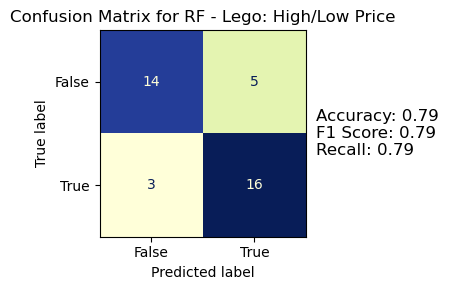

In [233]:
X_lego = df_lego.drop(columns=["title", "asin", "price_value", "price_tier", "coupon", 
                                "price_list_price", "price_name", "cluster",
                                "stock_info", "is_high_price"])

X_lego_encoded = pd.get_dummies(X_lego, columns=["lego_theme", "age_rec"])
y_lego = df_lego["is_high_price"]                              
X_lego_train, X_lego_test, y_lego_train, y_lego_test = train_test_split(X_lego_encoded, y_lego,
                                                                 test_size=0.20, random_state=1216) 
rf_lego = RandomForestClassifier(random_state = 1216,
                                       n_estimators = 200,
                                       min_samples_split = 10,
                                       min_samples_leaf = 2)
rf_lego.fit(X_lego_train, y_lego_train)

preds_lego = rf_lego.predict(X_lego_test)
accuracy = accuracy_score(y_lego_test, preds_lego)
f1 = f1_score(y_lego_test, preds_lego, average="micro")
recall = recall_score(y_lego_test, preds_lego, average="micro")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
cm_lego = confusion_matrix(y_lego_test, preds_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=rf_lego.classes_)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('Confusion Matrix for RF - Lego: High/Low Price')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
# Coordinates are relative to axes (x=0 is left, y=1 is top)
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_lego2.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Add labels to test data 
X_test_with_labels = X_lego_test.copy()
X_test_with_labels["true_label"] = y_lego_test
X_test_with_labels["predicted_label"] = preds_lego

#Get original rows from full dataset using test indices
merged = df_lego.iloc[X_lego_test.index].copy()
merged["true_label"] = y_lego_test.values
merged["predicted_label"] = preds_lego

#mis-classes
underpriced = merged[(merged["true_label"] == 0) & (merged["predicted_label"] == 1)]
overpriced = merged[(merged["true_label"] == 1) & (merged["predicted_label"] == 0)]

print("Underpriced Candidates:")
display(underpriced[["title", "price_value", "ratings_total", "discount%", "lego_theme", "age_rec", "true_label", "predicted_label"]])

print("Overpriced Candidates:")
display(overpriced[["title", "price_value", "ratings_total", "discount%", "lego_theme", "age_rec", "true_label", "predicted_label"]])

Underpriced Candidates:


,title,price_value,ratings_total,discount%,lego_theme,age_rec,true_label,predicted_label
9,LEGO Speed Champions Oracle Red Bull Racing RB...,25.64,508.0,0.05,Speed Champions,18.0,False,True
24,LEGO Botanicals Happy Plants Building Toys - B...,22.95,174.0,0.00,Botanicals,9.0,False,True
179,Flowers Roses Building Set Compatible with Leg...,19.99,13.0,0.38,Art,NaN,False,True
175,LEGO Jurassic World Collection [DVD],13.86,0.0,0.00,Other,NaN,False,True
173,Tree House Building Set Compatible with Lego F...,24.99,163.0,0.00,Friends,6.0,False,True


Overpriced Candidates:


,title,price_value,ratings_total,discount%,lego_theme,age_rec,true_label,predicted_label
71,LEGO Animal Crossing K.K.’s Concert in The Pla...,34.81,296.0,0.56,Other,7.0,True,False
87,LEGO City 4x4 Off-Roader Adventures 60387 Buil...,29.99,2009.0,0.00,City,6.0,True,False
177,"LEGO Icons Porsche 911 10295 Building Set, Col...",167.99,1844.0,0.00,Other,NaN,True,False


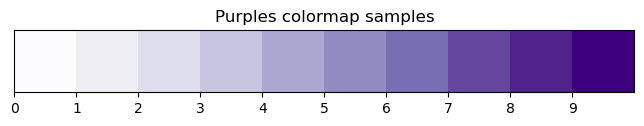

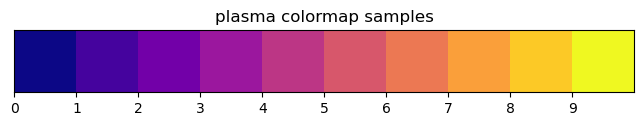

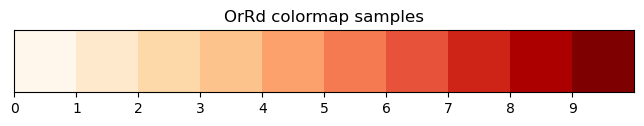

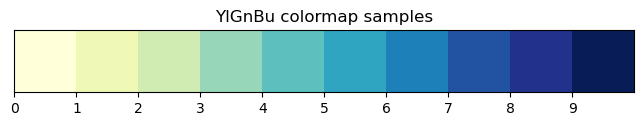

In [12]:
import matplotlib.pyplot as plt
import numpy as np

colormaps = ['Purples', 'plasma', 'OrRd', 'YlGnBu']

for cmap_name in colormaps:
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / 9) for i in range(10)]  # 10 color steps

    plt.figure(figsize=(8, 1))
    plt.imshow([colors], extent=[0, 10, 0, 1])
    plt.xticks(range(10), [f'{i}' for i in range(10)])
    plt.yticks([])
    plt.title(f'{cmap_name} colormap samples')
    plt.show()




In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Choose your colormap
cmap = plt.get_cmap("YlGnBu")  # or 'plasma', 'viridis', 'YlGnBu'

n_colors = 9  
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]

color = colors[3]

# Convert to hex (for use in other plots like bar charts)
hex_color = mcolors.to_hex(color)

print("RGBA:", color)
print("Hex:", hex_color)


RGBA: (0.4951787773933103, 0.8028604382929643, 0.733748558246828, 1.0)
Hex: #7ecdbb
